In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

from math import sqrt, floor
from random import randint

%matplotlib inline
sns.set(style="ticks")

In [2]:
def compute_CP(level):
    base_stamina = 80
    base_attack = 85
    base_defense = 76
    
    total_cp_multiplier = 0.095 * sqrt(level*2)
    
    stamina = (base_stamina + randint(0,15)) * total_cp_multiplier
    attack = (base_attack + randint(0,15)) * total_cp_multiplier
    defense = (base_defense + randint(0,15)) * total_cp_multiplier
    
    cp = max(10, floor(sqrt(stamina) * attack * sqrt(defense) / 10))
    return cp

In [7]:
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

In [8]:
cp_all = []
n_random_mon = 10000
for level in my_range(1, 20+1, step=0.5):
    for i in range(n_random_mon):
        cp_all.append(compute_CP(level))

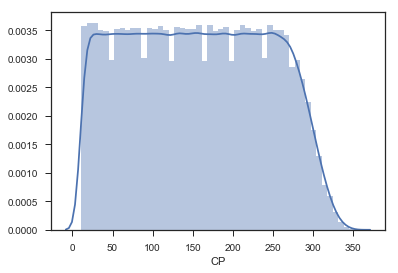

In [11]:
sns.distplot(cp_all, axlabel="CP")

In [13]:
n_evolutions = 75
n_candies = 75 * 12 - 75 # an evolution brings a candy, no time to transfer
print("To make {} evolutions you need {} candies.".format(n_evolutions, n_candies))

To make 75 evolutions you need 825 candies.


In [14]:
min_cp = 10
max_cp = 265 # arbitrary value based on looking to the previous graph

In [15]:
keep = 1
transfer = 1
print('With ananas => keep {} ({} candies), transfer {} ({} candies).'.format(keep,
                                                                              keep*6,
                                                                              transfer,
                                                                              transfer*6+transfer))
ratio = 1 - transfer / (keep+transfer)
print("Homogeneous distribution of cps between {} and {} => keep below cp {} else transfer.".format(min_cp, 
                                                                                                 max_cp, 
                                                                                                 round((min_cp+max_cp)*ratio)))

With ananas => keep 1 (6 candies), transfer 1 (7 candies).
Homogeneous distribution of cps between 10 and 265 => keep below cp 138 else transfer.


In [16]:
keep = 1
transfer = 3
print('Without ananas => keep {} ({} candies), transfer {} ({} candies).'.format(keep,
                                                                                keep*3,
                                                                                transfer,
                                                                                transfer*3+transfer))
ratio = 1 - transfer / (keep+transfer)
print("Homogeneous distribution of cps between {} and {} => keep below cp {} else transfer.".format(min_cp, 
                                                                                                 max_cp, 
                                                                                                 round((min_cp+max_cp)*ratio)))

Without ananas => keep 1 (3 candies), transfer 3 (12 candies).
Homogeneous distribution of cps between 10 and 265 => keep below cp 69 else transfer.


In [18]:
df = pd.DataFrame()
for i in my_range(1, 20+1, 0.5):
    cps = [compute_CP(i) for a in range(10000)]
    df[str(i)] = cps
df.head(3)

1  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  ...   16.5  17.0  17.5  \
0  16   22   29   34   44   53   56   64   73   85  ...    265   228   238   
1  13   23   29   33   41   51   61   62   65   77  ...    239   233   274   
2  13   23   26   32   42   54   60   61   73   82  ...    236   256   231   

   18.0  18.5  19.0  19.5  20.0  20.5  21.0  
0   292   249   288   263   296   303   295  
1   247   250   276   283   312   314   303  
2   237   246   259   276   263   276   313  

[3 rows x 41 columns]

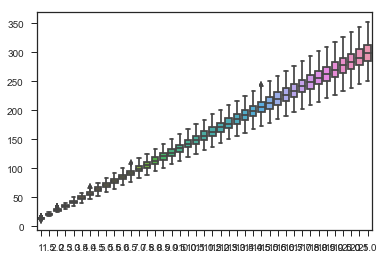

In [19]:
sns.boxplot(data=df)

# /!\

Pidgey with CP 444 can be found so there is necessarly a mistake in the CP calculation function (probably the total cp multiplier).